In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import t
from scipy.stats import multivariate_normal
import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF, Product,ExpSineSquared,RationalQuadratic
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import seaborn as sns

# Exercise 6

## Task 1 (Getting to know Gaussian processes)

Try to understand the following code. Experiment with adding noise to the y data or adding data points or removing data points or different functions of the independent variables. Try also some different kernels (see the imports) and hyperparameters (A visual comparison should give you enough intuition, you will do some additional tests later on).

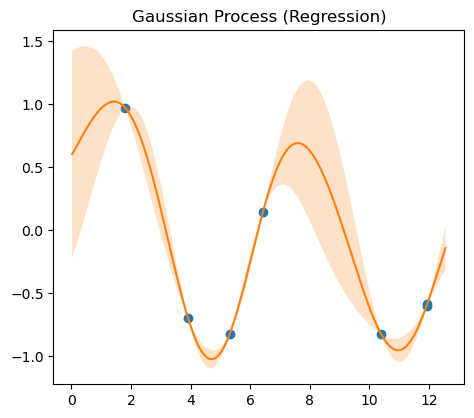

In [3]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 

# Create kernel and define Gaussian Process Regressor (GPR)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression)")
plt.show()

[5.26632349 6.42105966 2.6041222  7.97365028 7.87573651 9.17236924
 2.08613307]


C:\Users\akhil\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


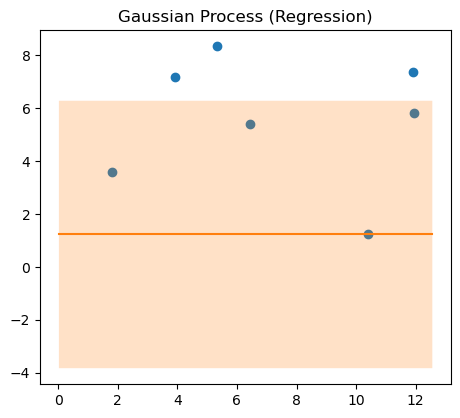

In [4]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x)

#mu, sigma = 0, 0.1
mu = np.mean(data_x)                                 #Addidng some noice to the y data.
sigma = np.std(data_x)
noise = np.random.normal(mu, sigma, 7)
print(noise)

data_y = np.sin(data_x) + noise

# Create kernel and define Gaussian Process Regressor (GPR)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression)")
plt.show()

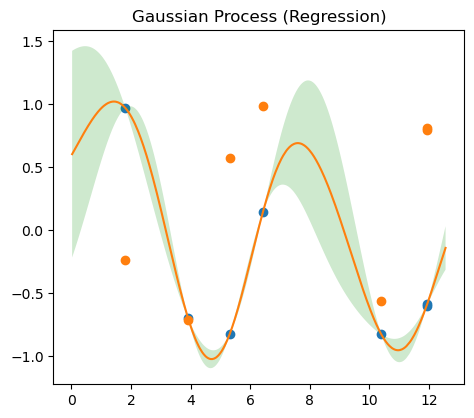

In [14]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x                                  
data_y = np.sin(data_x) 

#Adding data points and simultanously changing the function of the independent variable.
data_z = np.cos(data_x) 

# Create kernel and define Gaussian Process Regressor (GPR)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)
ax.scatter(data_x, data_z)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression)")
plt.show()

## Task 2 (Gaussian Process Priors)

**Task:** 
When we initialize the `GaussianProcessRegressor` with some chosen kernel functions (i.e. before fitting it to the available data), we have the opportunity to study the kernel functions directly. For this reason search for a list of implemented kernels in the sklearn documentation.

**Task:** Visualize some (at least 3) of the kernel functions you found in the documentation for several hyperparameter combinations. You can also experiment with self defined kernels by suitably combining kernel functions as explained in the lecture with the functions provided by sklearn. For the visualization make sure that every plot is sufficiently labeled.

*Hint: The commands `fit` and `sample_y` on the GPR object are important for this task.*

Using RationalQuadratic kernel

The RationalQuadratic kernel can be seen as a scale mixture (an infinite sum) of RBF kernels with different characteristic length scales

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


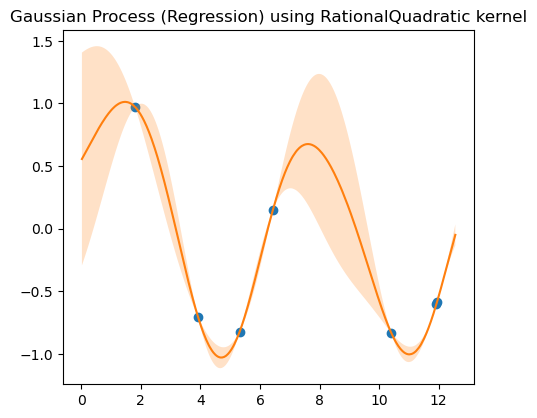

In [3]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 

# Create kernel and define Gaussian Process Regressor (GPR)


kernel = RationalQuadratic(length_scale=1.0, alpha=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) using RationalQuadratic kernel")
plt.show()

using RationalQuadratic kernel w noise

[ 7.81999685  8.3982898   1.20957074  8.99124851  2.43226463  8.03890571
 18.5100222 ]


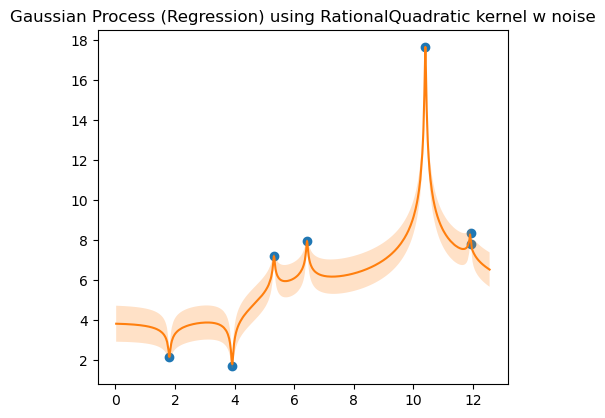

0.6143795947944548

In [42]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x)

#mu, sigma = 0, 0.1
mu = np.mean(data_x)                                 #Addidng some noice to the y data.
sigma = np.std(data_x)
noise = np.random.normal(mu, sigma, 7)
print(noise)

data_y = np.sin(data_x) + noise

# Create kernel and define Gaussian Process Regressor (GPR)
kernel = RationalQuadratic(length_scale=1.0, alpha=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) using RationalQuadratic kernel w noise")
plt.show()
r2_score(x_test,y_hat)

Using a combination of kernels suiting the data.

[9.11138203 6.78557055 4.50492191 9.74867401 3.33920091 6.81009792
 8.81878678]


C:\Users\akhil\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


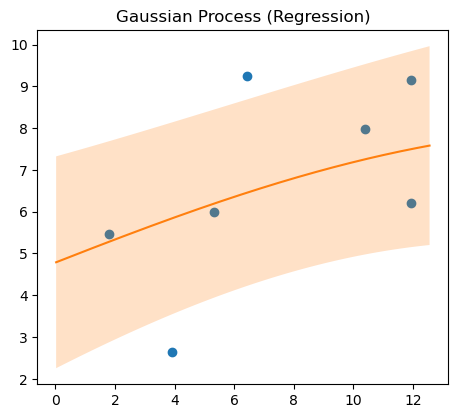

0.3997048855698925

In [116]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x)

mu = np.mean(data_x)                                 #Addidng some noice to the y data.
sigma = np.std(data_x)
noise = np.random.normal(mu, sigma, 7)
print(noise)

data_y = np.sin(data_x) + noise

# Create kernel and define Gaussian Process Regressor (GPR)

#From observing the data a small trend(falling) could be seen 
kernel_1 = 50.0**2 * RBF(length_scale=50.0)

#Since the data portrayed visible periodicity
kernel_2 = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
)

#With the introduction of noise irregularitied had evolved and due to this RationalQuadratic kernel could be used to model the data
kernel_3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

#Noise in the data is modelled using a combination of a radial basis function kernel and a white noise kernel
kernel_4 = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-6, 1e6))

#Combining all the above kernels
kernel =  (kernel_1 + kernel_2 + kernel_3 + kernel_4)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression)")
plt.show()
r2_score(x_test,y_hat)

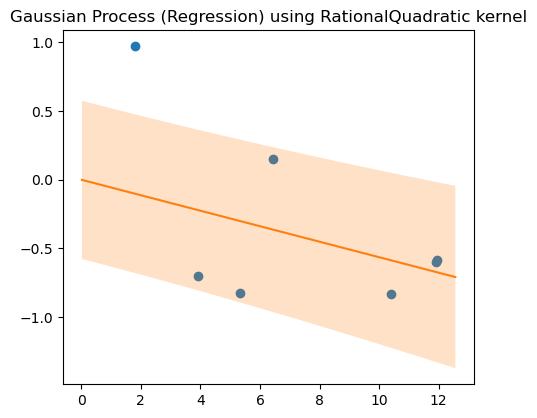

In [7]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 

# Create kernel and define Gaussian Process Regressor (GPR)


kernel = DotProduct() + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) using RationalQuadratic kernel")
plt.show()

## Task 3 (Gaussian Process Regression)

**Task:** Create some synthetic data with noise (or alternatively find some data that interests you e.g. on kaggle). Afterwards split the data into training and validation data employing the `train_test_split` function (look at the imports for detail). Visualize the data.

In [6]:
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor as gpr
from sklearn.gaussian_process.kernels import ConstantKernel

In [7]:
#Generating synthetic data 
d= 1
n = 1000
L = 2
random_state = 1
x = np.linspace(start = 0, stop = L, num = n)
X = x.reshape(n,d)

# Let the error standard deviation be
sigma_n = 0.1

# Error(noise) is defined by
error = np.random.normal (loc = 0,scale = sigma_n, size = n)

# creating a non-linear function
def f(x):
    f = np.sin((4*np.pi)*x) #+ np.sin((7*np.pi)*x) #+ np.sin((3*np.pi)*x)
    return(f)
       
              
func = f(x)
#final observed output variable 
y = func + error

In [8]:
#Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
X_test.shape

(500,)

In [9]:
#Defining a kernel and model
#Create kernel and define Gaussian Process Regressor (GPR)
#kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.2, noise_level_bounds=(1e-100))
#gp = gpr(kernel=kernel, random_state = 0)

l = 0.1
sigma_f = 2

kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
            * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))
# Define GaussianProcessRegressor object. 
gp = gpr(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10 )

#Model fit
gp.fit(X,y)

#predicting the test set
y_pred = gp.predict(X_test.reshape(-1,1))

y_pred_samples = gp.sample_y(X_test.reshape(-1,1), n)
#Computing mean of the samples

y_pred_mean = np.apply_over_axes(func=np.mean, a=y_pred_samples, axes=1).squeeze()

#y_pred_mean, y_pred_std = gp.predict(X_test.reshape(-1,1), return_std= True)
y_pred_tr_std = np.apply_over_axes(func=np.std, a=y_pred_samples, axes=1).squeeze()

r2_score(y_pred,y_test)

0.9820876474881888

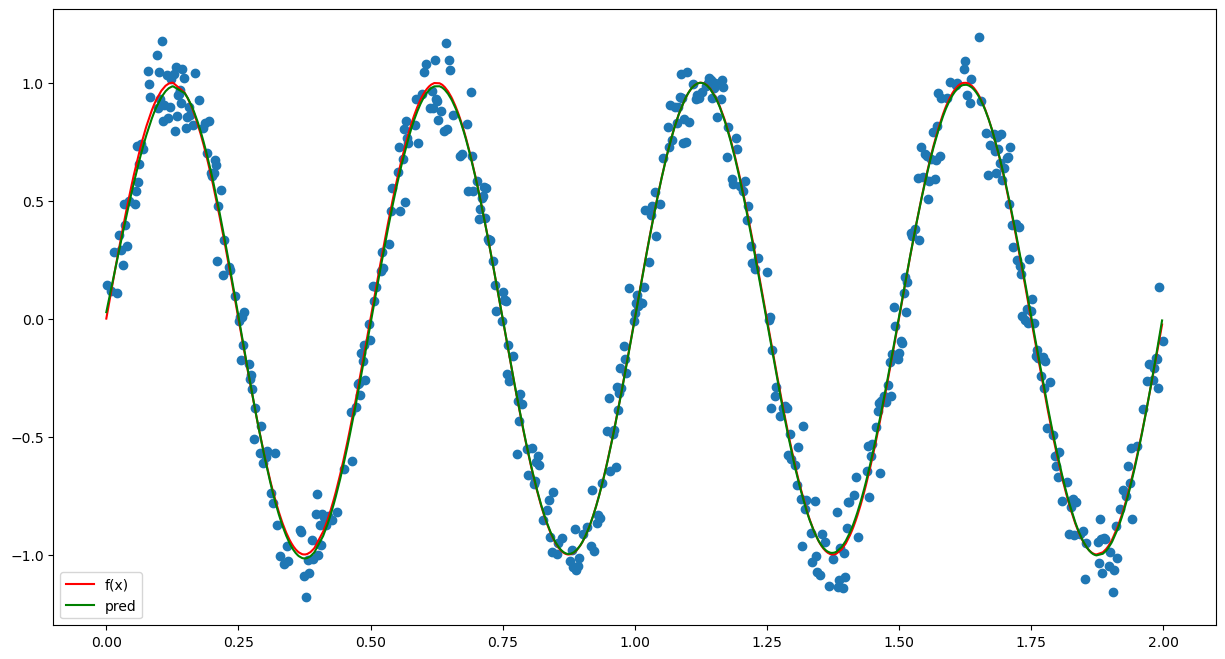

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
#sns.scatterplot(x=x, y=y, label='training data', ax=ax);
sns.lineplot(
    x=X_test, 
    y=f(X_test), 
    color='red', 
    label='f(x)', 
    ax=ax)
plt.scatter(X_train,y_train)

#sns.lineplot(x=X_test, y=y_pred_mean, color='green', label='pred')
#plt.plot(X_test,y_pred)

lower = y_pred_mean - y_pred_tr_std
upper = y_pred_mean + y_pred_tr_std
#ax.fill_between(x = X_test,y1 = lower, y2 = upper,color='green', alpha=0.3, label='Credible Interval')

sns.lineplot(x=X_test, y=y_pred, color='green', label='pred')
ax.legend(loc='lower left')

**Task:** Fit a GPR model to your data for fixed hyperparameters (sklearn automatically performs hyperparameter tuning so make sure to turn it off).

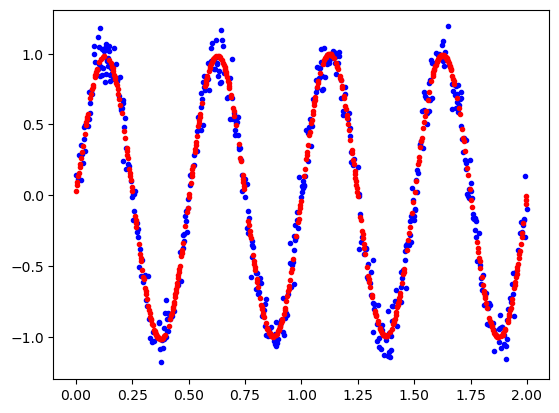

In [11]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "r.")
plt.show()

**Task:** Determine the log-marginal-likelihood for your fixed parameters in the fitted model. Visualize how well your models fit the data.

In [11]:
log_likelihood = gp.log_marginal_likelihood()
print("Log-marginal-likelihood:", log_likelihood)

Log-marginal-likelihood: 823.8772592968201


**Task:** Try to optimize (either by hand or in a grid based search, i.e. nothing too fancy, unless you want to make this a voluntary task) the hyparameters by finding a local maximum of the log-marginal-likelihood.

**Task:** Compare your hyperparameters from the previous task with the hyperparameters obtained by sklearn when you allow for hyperparameter tuning.

## Voluntary Task 1 (First come, first serve principle)
### For up to 2 students

**Task:** Write a function that for a n-D  multivariate Gaussian $N(\mu \in \mathbb R^n, \Sigma \in \mathbb R^{n\times n})$ determines the marginal distribution for a given subset of indices $I \subset \{1, 2, \ldots, n\}$. Write a second function that can be used to condition a n-D multivariate Gaussian $N(\mu \in \mathbb R^n, \Sigma \in \mathbb R^{n\times n})$ when data is provided on a subset of the random variables. Make sure the functions are sufficiently documented.

## Voluntary Task 2 (First come, first serve principle)
### For up to 3 students

**Task:** Implement a simple Bayesian optimization example for determining the best experiments to find an optimum of an "unknown" function. Make sure to visualize the difference between exploitation and exploration. *Hint: The GPyOpt module and documentation could be good starting point.*